## Import dependencies

In [116]:
from src.integration import *
from src.model import *
from src.bifurcation import *
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

## Euler method for SIR

In [117]:
t_0 = 0
t_end = 200

beta=11.5
A=20
d=0.1
nu=1
b=0.022
mu0 = 10      
mu1 = 10.45
y0 = [195.3, 0.052, 4.4]

t = np.linspace(t_0, t_end, 3000)

model = SIR(t_0, t_end, beta, A, d, nu, b, mu0, mu1)

X, infodict = integrate.odeint(model.integration_model, y0, t, full_output=True)

In [120]:
for i in X:
    new_X.append([i[0],i[1]])

In [121]:
x,y = np.array(new_X).T

In [167]:
S, I = np.linspace(-1500,200, 100), np.linspace(-1500,200, 100)

# Andronov_Hopf normal form   
dSdt = A - d * S - (beta * S * I) / (S + I + R)
dIdt = - (d + nu) * I - m * I + (beta * S * I) / (S + I + R)

plt.figure(figsize=(7, 7))


<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

ValueError: 'u' and 'v' must match the shape of 'Grid(x, y)'

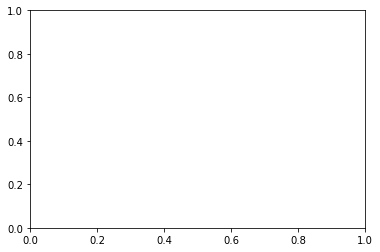

In [168]:
plt.streamplot(S, I, dSdt, dIdt, color='r')

AttributeError: 'int' object has no attribute 'ndim'

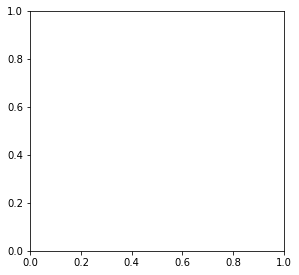

In [91]:
fig = plt.figure(figsize=(10, 20))
gs = gridspec.GridSpec(nrows=3, ncols=2, height_ratios=[1, 1, 2])

#  Varying density along a streamline
ax0 = fig.add_subplot(gs[0, 0])
ax0.streamplot(t_end, t_end, s, i, color='red')

## Hopf Bifurcation for SIR

    """
    SIR model including hospitalization and natural death.

    Parameters:
    -----------
    mu0
        Minimum recovery rate
    mu1
        Maximum recovery rate
    beta
        average number of adequate contacts per unit time with infectious individuals
    A
        recruitment rate of susceptibles (e.g. birth rate)
    d
        natural death rate
    nu
        disease induced death rate
    b
        hospital beds per 10,000 persons
    """